# Building a CNN from Scratch - Lab

## Introduction

Now that you have background knowledge regarding how Convolution Neural Networks (CNNs) work and how to build them using Keras, its time to practice those skills a little more independently in order to build a CNN (or ConvNet) on your own to solve a image recognition problem. In this lab, you'll practice building an image classifier from start to finish using a CNN.  

## Objectives

In this lab you will: 

- Load images from a hierarchical file structure using an image datagenerator 
- Apply data augmentation to image files before training a neural network 
- Build a CNN using Keras 
- Visualize and evaluate the performance of CNN models 

## Loading the Images

The data for this lab are a bunch of pictures of cats and dogs, and our task is to correctly classify a picture as one or the other. The [original dataset](https://www.kaggle.com/c/dogs-vs-cats) is from Kaggle. We have downsampled this dataset in order to reduce training time for you when you design and fit your model to the data. ⏰ It is anticipated that this process will take approximately one hour to run on a standard machine, although times will vary depending on your particular computer and set up. At the end of this lab, you are welcome to try training on the complete dataset and observe the impact on the model's overall accuracy. 

You can find the initial downsampled dataset in a subdirectory, **cats_dogs_downsampled**, of this repository. 

In [1]:
# Load the images

train_dir = 'cats_dogs_downsampled/train'
validation_dir = 'cats_dogs_downsampled/val/'
test_dir = 'cats_dogs_downsampled/test/' 

In [2]:
# Set-up date time to track how long run time takes
import datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

In [3]:
# Preprocess the images into tensors
# Rescale the data by 1/.255 and use binary_crossentropy loss
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')


Found 2140 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


## Designing the Model

Now it's time to design your CNN using Keras. Remember a few things when doing this: 

- You should alternate convolutional and pooling layers
- You should have later layers have a larger number of parameters in order to detect more abstract patterns
- Add some final dense layers to add a classifier to the convolutional base 
- Compile this model 

In [5]:
# Design the model
# Note: You may get a comment from tf regarding your kernel. This is not a warning per se, but rather informational.
# Import Tools
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
# Compile the model
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## Training and Evaluating the Model

Remember that training deep networks is resource intensive: depending on the size of the data, even a CNN with 3-4 successive convolutional and pooling layers is apt to take a hours to train on a high end laptop. See the code chunk below to see how long it took to run your model. 

If you are concerned with runtime, you may want to set your model to run the training epochs overnight.  

**If you are going to run this process overnight, be sure to also script code for the following questions concerning data augmentation. Check your code twice (or more) and then set the notebook to run all, or something equivalent to have them train overnight.** 

In [7]:
# Set the model to train 
# Note: You may get a comment from tf regarding your GPU or sometning similar.
# This is not a warning per se, but rather informational.
# ⏰ This cell may take several minutes to run 
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=20)

Epoch 1/30


2024-03-08 18:56:08.101562: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-08 18:56:08.406159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x20x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be

100/100 [==============================] - ETA: 0s - loss: 0.6820 - acc: 0.5510

2024-03-08 18:56:16.764197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x20x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x20x1x1xi1>'


100/100 [==============================] - 9s 63ms/step - loss: 0.6820 - acc: 0.5510 - val_loss: 0.6619 - val_acc: 0.6225
Epoch 2/30
100/100 [==============================] - 6s 61ms/step - loss: 0.6356 - acc: 0.6365 - val_loss: 0.6197 - val_acc: 0.6325
Epoch 3/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5867 - acc: 0.6965 - val_loss: 0.5895 - val_acc: 0.6725
Epoch 4/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5599 - acc: 0.7095 - val_loss: 0.5694 - val_acc: 0.7000
Epoch 5/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5348 - acc: 0.7270 - val_loss: 0.5660 - val_acc: 0.7225
Epoch 6/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5148 - acc: 0.7470 - val_loss: 0.5405 - val_acc: 0.7225
Epoch 7/30
100/100 [==============================] - 6s 62ms/step - loss: 0.4910 - acc: 0.7565 - val_loss: 0.5488 - val_acc: 0.7075
Epoch 8/30
100/100 [==============================] - 6s 61ms/step - loss: 0.472

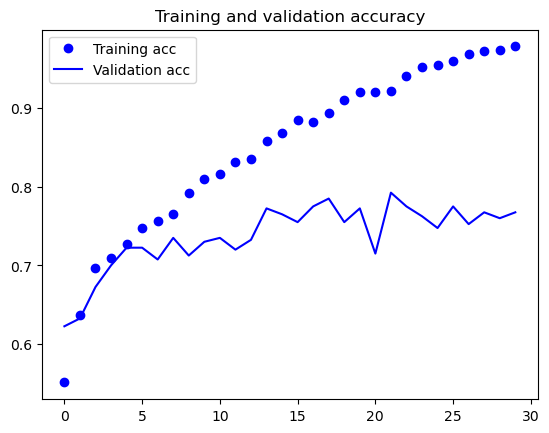

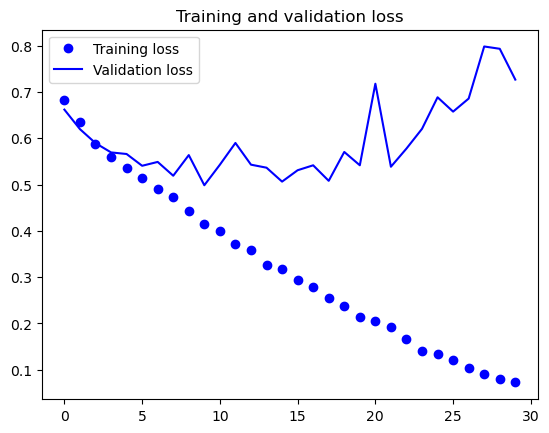

In [8]:
# Plot history
import matplotlib.pyplot as plt
%matplotlib inline

# Type code here for plot history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
# Check runtime

end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Training took a total of 0:16:58.027479


## Save the Model

In [10]:
# Save the model for future reference 
model.save('cats_dogs_downsampled_data.h5')

## Data Augmentation

Recall that data augmentation is typically always a necessary step when using a small dataset as this one which you have been provided. If you haven't already, implement a data augmentation setup.

**Warning: ⏰ This process may take awhile depending on your set-up. As such, make allowances for this as necessary.** 

In [11]:
# Set-up date time to track how long run time takes
start = datetime.datetime.now()

In [12]:
# Add data augmentation to the model setup and set the model to train; 
# See the warnings above if you intend to run these blocks of code 
# ⏰ These cells where may take quite some time to run
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

history = model.fit(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=20)

Found 2140 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 8s 75ms/step - loss: 0.6696 - acc: 0.6825 - val_loss: 0.4853 - val_acc: 0.7625
Epoch 2/30
100/100 [==============================] - 8s 79ms/step - loss: 0.5576 - acc: 0.7150 - val_loss: 0.5283 - val_acc: 0.7300
Epoch 3/30
100/100 [==============================] - 8s 75ms/step - loss: 0.5500 - acc: 0.7245 - val_loss: 0.5047 - val_acc: 0.7550
Epoch 4/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5431 - acc: 0.7295 - val_loss: 0.5210 - val_acc: 0.7225
Epoch 5/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5250 - acc: 0.7290 - val_loss: 0.4808 - val_acc: 0.7650
Epoch 6/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5267 - acc: 0.7325 - val_loss: 0.4778 - val_acc: 0.7875
Epoch 7/30
100/100 [==============================] - 9s 85ms/step - loss: 0.5061 - acc: 0.7520 - val_loss: 0.4808 - val_acc: 0.7850
Epoch 8/30
100/100 [=======

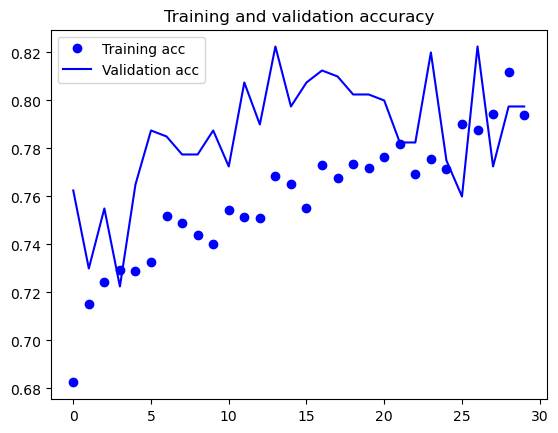

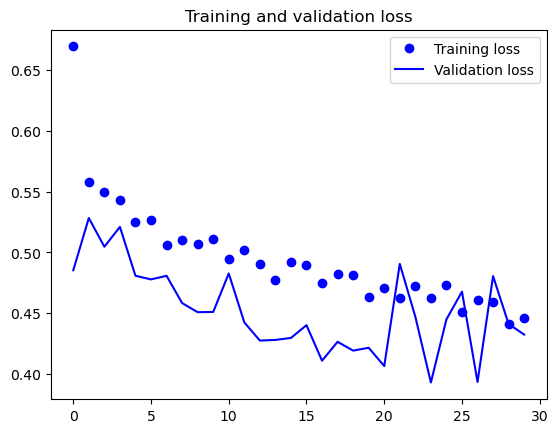

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
# Check runtime 
end = datetime.datetime.now()
elapsed = end - start
print('Training with data augmentation took a total of {}'.format(elapsed))

Training with data augmentation took a total of 0:03:56.613639


Save the model for future reference.  

In [15]:
# Save the model 
model.save('cats_dogs_downsampled_with_augmentation_data.h5')


## Final Evaluation

Now use the test set to perform a final evaluation on your model of choice. 

In [16]:
# Perform a final evaluation using the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150, 150), 
                                                  batch_size=20, 
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, steps=20)
print('test acc:', test_acc)

Found 425 images belonging to 2 classes.
20/20 [==============================] - 0s 20ms/step - loss: 0.4844 - acc: 0.7775
test acc: 0.7774999737739563


## Summary

Well done. In this lab, you practice building your own CNN for image recognition which drastically outperformed our previous attempts using a standard deep learning model alone. In the upcoming sections, we'll continue to investigate further techniques associated with CNNs including visualizing the representations they learn and techniques to further bolster their performance when we have limited training data such as here.